In [1]:
#Import all relevant packages (ie:Pandas, Numpy, SKlearn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [2]:
#Open dataset file address and identify variables
dm=pd.read_csv('D:\School\FINAL PROJECT\cleandata.csv')
dm.head()

dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65534 entries, 0 to 65533
Data columns (total 23 columns):
race                        65534 non-null int64
gender                      65534 non-null int64
age                         65534 non-null int64
admission_type_id           65534 non-null int64
discharge_disposition_id    65534 non-null int64
admission_source_id         65534 non-null int64
time_in_hospital            65534 non-null int64
num_lab_procedures          65534 non-null int64
num_procedures              65534 non-null int64
num_medications             65534 non-null int64
number_outpatient           65534 non-null int64
number_emergency            65534 non-null int64
number_inpatient            65534 non-null int64
diag_1                      65534 non-null float64
diag_2                      65534 non-null float64
diag_3                      65534 non-null float64
number_diagnoses            65534 non-null int64
max_glu_serum               65534 non-null int64
A1C

In [3]:
#Use StandardScaler to set mean=0; use 'drop' to remove variables with categorical values
sc = StandardScaler()
scaledData = pd.DataFrame(sc.fit_transform(dm.drop(['race','gender','admission_type_id','discharge_disposition_id','admission_source_id'],axis=1)),
                          columns=dm.drop(['race','gender','admission_type_id','discharge_disposition_id','admission_source_id'],axis=1).columns)
scaledData.head()

#Select x and y variables; drop race and gender from X-axis
x = dm.drop(['readmitted'],axis=1)
y = dm['readmitted']
x.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,Medication Factor,change,diabetesMed
0,3,1,5,6,25,1,1,41,0,1,...,0,250.83,0.00,0.0,1,0,0,0,0,0
1,3,1,15,1,1,7,3,59,0,18,...,0,276.00,250.01,255.0,9,0,0,3,1,1
2,1,1,25,1,1,7,2,11,5,13,...,1,648.00,250.00,27.0,6,0,0,2,0,1
3,3,2,35,1,1,7,2,44,1,16,...,0,8.00,250.43,403.0,7,0,0,3,1,1
4,3,2,45,1,1,7,1,51,0,8,...,0,197.00,157.00,250.0,5,0,0,4,1,1


In [4]:
#Partition data; separate into training set and test set
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=69)

#Import Regression package
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

#Linear Regression; use round() function to turn y-value into integer(prevents error in LinearRegression)
lir = LinearRegression()

mobj = [lir]
mname = ['LinearRegression']
for obj,name in zip(mobj,mname):
    obj.fit(xtrain,ytrain)
    ypred = obj.predict(xtest)
    print('\n---',name,'--- \n')
    print('accuracy_score \n',accuracy_score(ytest,ypred.round(), normalize=False))
    #Predicted Versus Actuals
    print('confusion_matrix \n',confusion_matrix(ytest,ypred.round()))
    print('classification_report \n',classification_report(ytest,ypred.round()))


--- LinearRegression --- 

accuracy_score 
 6444
confusion_matrix 
 [[2818 4190    7    0]
 [1040 3607   14    0]
 [ 277 1134   19    1]
 [   0    0    0    0]]
classification_report 
               precision    recall  f1-score   support

         0.0       0.68      0.40      0.51      7015
         1.0       0.40      0.77      0.53      4661
         2.0       0.47      0.01      0.03      1431
         3.0       0.00      0.00      0.00         0

    accuracy                           0.49     13107
   macro avg       0.39      0.30      0.27     13107
weighted avg       0.56      0.49      0.46     13107



C:\Users\Andy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [5]:
#Import Gaussian package
from sklearn.naive_bayes import GaussianNB

#Calculate for Gaussian and Logistic Regression
nb =GaussianNB()
lor = LogisticRegression()
mobj = [lor,nb]
mname = ['LogisticRegression','GaussianNB']

for obj,name in zip(mobj,mname):
    #Using our taining partitions we recursively fit and train the models. Y is NoShow and the target field
    obj.fit(xtrain,ytrain)
    ypred = obj.predict(xtest)
    print('\n---',name,'--- \n')
    print('accuracy_score \n',accuracy_score(ytest,ypred))
    #Predicted Versus Actuals
    print('confusion_matrix \n',confusion_matrix(ytest,ypred))
    print('classification_report \n',classification_report(ytest,ypred))

C:\Users\Andy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Andy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



--- LogisticRegression --- 

accuracy_score 
 0.5633630884260319
confusion_matrix 
 [[6267  745    3]
 [3542 1116    3]
 [1025  405    1]]
classification_report 
               precision    recall  f1-score   support

           0       0.58      0.89      0.70      7015
           1       0.49      0.24      0.32      4661
           2       0.14      0.00      0.00      1431

    accuracy                           0.56     13107
   macro avg       0.40      0.38      0.34     13107
weighted avg       0.50      0.56      0.49     13107


--- GaussianNB --- 

accuracy_score 
 0.545662623025864
confusion_matrix 
 [[6185  610  220]
 [3557  805  299]
 [1017  252  162]]
classification_report 
               precision    recall  f1-score   support

           0       0.57      0.88      0.70      7015
           1       0.48      0.17      0.25      4661
           2       0.24      0.11      0.15      1431

    accuracy                           0.55     13107
   macro avg       0.43     

In [6]:
#Import DecisionTree and RandomForest Clasifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [7]:
#Random Forest Classifer
model=RandomForestClassifier()
dforest=model.fit(xtrain,ytrain)

yp=dforest.predict(xtest)

print('\n---','Random Forest','--- \n')
print('accuracy_score \n',accuracy_score(ytest,yp))
print('confusion_matrix \n',confusion_matrix(ytest,yp))
print('classification_report \n',classification_report(ytest,yp))

C:\Users\Andy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



--- Random Forest --- 

accuracy_score 
 0.5460440985732814
confusion_matrix 
 [[5322 1588  105]
 [2754 1779  128]
 [ 826  549   56]]
classification_report 
               precision    recall  f1-score   support

           0       0.60      0.76      0.67      7015
           1       0.45      0.38      0.41      4661
           2       0.19      0.04      0.07      1431

    accuracy                           0.55     13107
   macro avg       0.42      0.39      0.38     13107
weighted avg       0.50      0.55      0.51     13107



In [8]:
#Decision Tree Classifier
model=DecisionTreeClassifier()
dtree=model.fit(xtrain,ytrain)

yp=dtree.predict(xtest)

print('\n---','Decision Tree','--- \n')
print('accuracy_score \n',accuracy_score(ytest,yp))
print('confusion_matrix \n',confusion_matrix(ytest,yp))
print('classification_report \n',classification_report(ytest,yp))


--- Decision Tree --- 

accuracy_score 
 0.47600518806744485
confusion_matrix 
 [[4021 2215  779]
 [2076 1950  635]
 [ 618  545  268]]
classification_report 
               precision    recall  f1-score   support

           0       0.60      0.57      0.59      7015
           1       0.41      0.42      0.42      4661
           2       0.16      0.19      0.17      1431

    accuracy                           0.48     13107
   macro avg       0.39      0.39      0.39     13107
weighted avg       0.49      0.48      0.48     13107



Text(27.671716579861112, 0.5, '# of Meds')

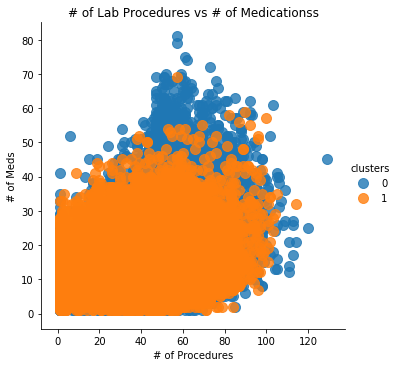

In [9]:
#Package used for Kmeans learning
from sklearn.cluster import KMeans

df = dm.drop(['gender','race'], axis=1)
df.head()

#Sorting into two clusters across ENTIRE dataset
kmeans = KMeans(n_clusters=2, random_state=0).fit(df)
labels = kmeans.labels_

#kMean labels are added to our dataframe
df['clusters'] = labels


#Scatter plot of only clusters Age Vs No-Show using seaborn packages
sns.lmplot('num_lab_procedures', 'num_medications', 
           data=df, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('# of Lab Procedures vs # of Medicationss')
plt.xlabel('# of Procedures')
plt.ylabel('# of Meds')